# Import libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
data = pd.read_csv('/Users/muhammaddildar/Desktop/cleaned_kc_house_data.csv')

In [3]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0


In [4]:
print(data.isnull().sum())

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
was_renovated    0
dtype: int64


In [5]:
print(data.dtypes)

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
was_renovated      int64
dtype: object


# Explore your data visually (e.g., by way of a scatterplot), looking for variables whose relationship you’d like to test.

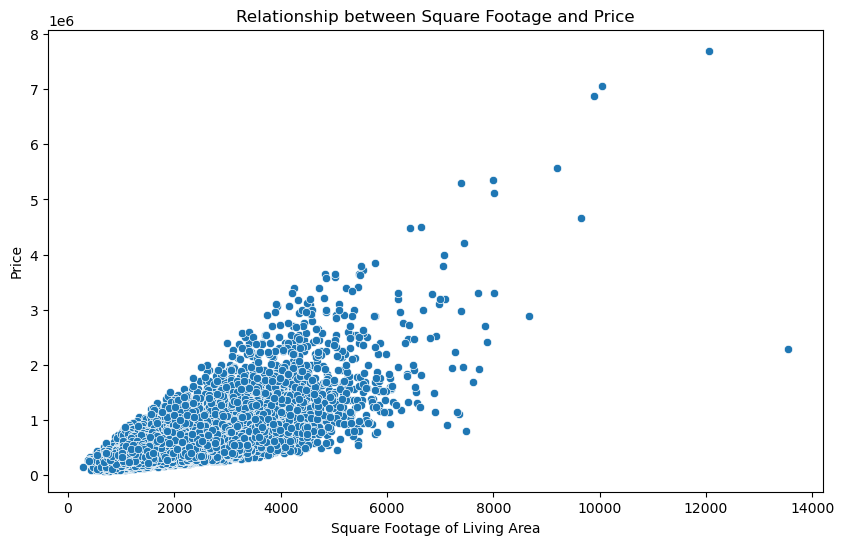

In [6]:

# Scatterplot of sqft_living vs price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='sqft_living', y='price')
plt.title('Relationship between Square Footage and Price')
plt.xlabel('Square Footage of Living Area')
plt.ylabel('Price')
plt.show()


### Hypothesis:
The greater the square footage of the living area, the higher the house price.


## Reshape the variables into NumPy arrays, with X being the independent variable and y being the dependent variable
Split the data into two sets: a training set and a test set.

In [8]:
# Define X and y
X = data['sqft_living'].values.reshape(-1, 1)
y = data['price'].values.reshape(-1, 1)


In [9]:
from sklearn.model_selection import train_test_split

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


##  Run a linear regression on the data. Create a plot that shows the regression line on the test set.


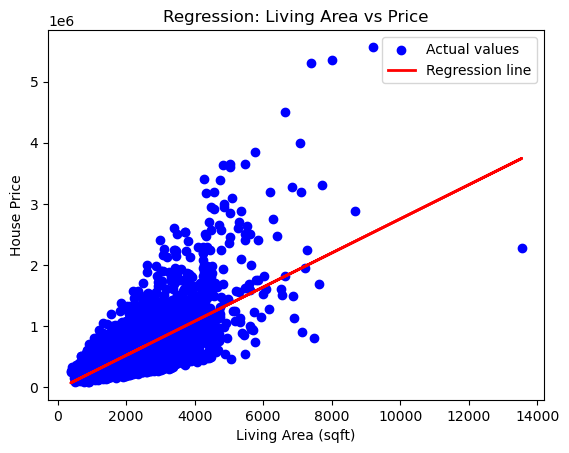

In [11]:
# Predict using the test set
y_pred = regression.predict(X_test)

# Visualize the results
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue', label='Actual values')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('Living Area (sqft)')
plt.ylabel('House Price')
plt.title('Regression: Living Area vs Price')
plt.legend()
plt.show()


### Interpretation of the Regression Line

The scatterplot above illustrates the relationship between the living area (in square feet) and house price. The red regression line represents the model’s predicted house prices, while the blue dots are the actual values from the test set.

From the plot, we can observe a positive relationship — as the square footage increases, house prices also tend to increase. This supports our hypothesis that larger living areas are generally associated with higher house prices.

However, the actual data points are widely scattered around the regression line, especially in higher square footage ranges. This indicates that while living area is a meaningful predictor, it is not the only factor influencing house price. Additional variables such as location, condition, view, and renovations might improve the model's predictive power.


## Check the model performance statistics—MSE and R2 score

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict y values using the test set
y_pred = regression.predict(X_test)

# Calculate MSE and R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Squared Error (MSE): 74509993356.49603
R² Score: 0.48388319278201475


### 📉 Predicted vs Actual Values: Interpretation

To further evaluate the model’s performance, I compared the predicted house prices with the actual prices. While the regression line shows a generally increasing trend—indicating that larger living areas are associated with higher prices—there is a noticeable spread of data points around the line.

This means that although **living area (sqft)** is a significant factor, it **does not fully explain** the variability in house prices. The predicted values often differ from the actual ones, suggesting that other predictors (e.g., location, condition, view, year built) could help build a more accurate model.

This also reflects in the **R² score of 0.48**, indicating that the model only explains about **48% of the variation** in house prices.


In [15]:
# Create a DataFrame to compare actual vs. predicted values
comparison = pd.DataFrame({'Actual Price': y_test.flatten(), 'Predicted Price': y_pred.flatten()
}).round(2)


# Display the first 10 rows
comparison.head(10)


,Actual Price,Predicted Price
0,365000.0,536638.49
1,865000.0,768631.89
2,1038000.0,1011805.69
3,1490000.0,1232618.68
4,711000.0,670803.35
5,211000.0,436014.85
6,790000.0,709934.76
7,680000.0,461170.76
8,384500.0,405268.73
9,605000.0,212406.75


### Interpretation of Actual vs. Predicted Values

The comparison table above displays the actual house prices against the predicted prices generated by the regression model. While the predictions are generally within a reasonable range of the actual values, some notable differences exist—especially in cases where the actual price is either very high or very low. This suggests that although the model captures the general trend, it struggles with extreme values and might benefit from additional predictors or outlier handling. The differences also visually confirm the earlier MSE and R² results, indicating that the model has moderate predictive power but leaves room for improvement.


# Reflection on Data Bias

While this regression model shows a moderate ability to predict house prices based on living area, it's important to acknowledge the potential impact of data bias. Using only one predictor (sqft_living) may oversimplify the complexity of housing prices and ignore other critical factors like location, condition, year built, or proximity to amenities. This can result in biased predictions, particularly for properties that deviate from the norm. Additionally, if the training data itself reflects any historical or regional biases (e.g., fewer high-end or low-end properties), the model may inherit those biases in its predictions. Ensuring a diverse and representative dataset, adding multiple predictors, and carefully handling outliers are essential steps for building a more accurate and fair predictive model.
